In [42]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer

from mordecai import Geoparser



<b> DOUBLE CHECK MY CLEANING: <B>

In [43]:
Hurricane_Tweets = pd.read_csv('Hurricane_Harvey_Tweets_Cleaned_Time_Removed.csv',lineterminator='\n')

In [44]:
#Check NaN's and Nulls again
Hurricane_Tweets[Hurricane_Tweets.Tweet.isna()]

,Tweet
11903,NaN
14759,NaN
23092,NaN
37273,NaN
39298,NaN
...,...
387147,NaN
387148,NaN
387441,NaN
387442,NaN


In [45]:
# Drop Nulls/NaN's
Hurricane_Tweets_Cleaned_NaN= Hurricane_Tweets.dropna(subset = ['Tweet'])

In [120]:
Hurricane_Tweets_Cleaned_NaN

,Tweet
0,if you do decide to drive in for coldplayhous...
1,as hurricane harvey is fast approaching now i...
2,is jerryjordan ktt providing live hurricaneh...
3,i m waiting for a steve harvey hurricane meme
4,the name of the hurricane is harvey steve ...
...,...
399390,lawyers wanting to provide pro bono help in th...
399391,hurricane harvey alabama�s largest church alr...
399392,hurricane harvey pressures already tight houst...
399393,our thoughts are with our neighbors in the sou...


In [46]:
# Check if all the Null's were dropped
Hurricane_Tweets_Cleaned_NaN[Hurricane_Tweets_Cleaned_NaN.Tweet.isna()]

,Tweet


In [47]:
# Convert the Tweet column to a list
list_of_tweets = Hurricane_Tweets_Cleaned_NaN['Tweet'].to_list()

In [117]:
String_Tweets_CLEANED= Hurricane_Tweets_Cleaned_NaN['Tweet'].astype(str)

In [119]:
String_Tweets_CLEANED

0    if you do decide to drive in for  coldplayhous...
1    as hurricane harvey is fast approaching  now i...
2    is  jerryjordan ktt providing live  hurricaneh...
3        i m waiting for a steve harvey hurricane meme
4    the name of the hurricane is harvey     steve ...
Name: Tweet, dtype: object

In [79]:
Hurricane_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399395 entries, 0 to 399394
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tweet   398905 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [8]:
# to remove certain stop words 
# ENGLISH_STOP_WORDS.remove

In [69]:
# create a new dataframe and then convert it to a string
String_Tweets = Hurricane_Tweets['Tweet'].astype(str)

In [92]:
test.to_csv('String_Tweets_test.csv',index = False)

In [80]:
String_Tweets

0         if you do decide to drive in for  coldplayhous...
1         as hurricane harvey is fast approaching  now i...
2         is  jerryjordan ktt providing live  hurricaneh...
3             i m waiting for a steve harvey hurricane meme
4         the name of the hurricane is harvey     steve ...
                                ...                        
399390    lawyers wanting to provide pro bono help in th...
399391    hurricane harvey  alabama�s largest church alr...
399392    hurricane harvey pressures already tight houst...
399393    our thoughts are with our neighbors in the sou...
399394    marylanders head to texas to assist with hurri...
Name: Tweet, Length: 399395, dtype: object

In [87]:
test = pd.read_csv('String_Tweets.csv',lineterminator='\n')

In [91]:
test

,Tweet
0,if you do decide to drive in for coldplayhous...
1,as hurricane harvey is fast approaching now i...
2,is jerryjordan ktt providing live hurricaneh...
3,i m waiting for a steve harvey hurricane meme
4,the name of the hurricane is harvey steve ...
...,...
399390,lawyers wanting to provide pro bono help in th...
399391,hurricane harvey alabama�s largest church alr...
399392,hurricane harvey pressures already tight houst...
399393,our thoughts are with our neighbors in the sou...


<b> Add stop words to the english dict. that I dont want to include: </b>

In [48]:
stop_words = ENGLISH_STOP_WORDS.union(['harvey','hurricaneharvey','html','hurricane','texas','steve','com','http','link','pic','twitter','tweet','www','https',])

In [49]:
## Lementize Here (or put it within the vectorizer below)
## Ask Valentina
lemmatizer = WordNetLemmatizer()

In [50]:
import nltk 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachelbryn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
def preprocessor(doc):
    return lemmatizer.lemmatize(doc)
   
    
    # return " ".join(doc)

In [12]:
tfidf = TfidfVectorizer(stop_words=stop_words, preprocessor = preprocessor)

tweet_word_matrix = tfidf.fit_transform(list_of_tweets)

vocab = tfidf.get_feature_names()

pd.DataFrame(tweet_word_matrix.toarray(), index=list_of_tweets, columns=tfidf.get_feature_names()).head(10)

/Users/rachelbryn/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,aa,aaa,aaaa,aaaaaa,aaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaand,aaaaaaah,aaaaaaand,aaaaaaaye,...,zzqjgutjin,zzqpokqleri,zzrolqyq,zzsaunubjz,zzspqt,zztop,zzvncgpmxq,zzxrjvbrid,zzz,zzzxgnbk
if you do decide to drive in for coldplayhouston be prepared to stay because there might not be gas to get you home hurricaneharvey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
as hurricane harvey is fast approaching now is the time to do what you can to prepare your property to minimize http fb me �,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
is jerryjordan ktt providing live hurricaneharvey coverage for kicknthetires \r\n\r\n askingforafriend,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
i m waiting for a steve harvey hurricane meme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the name of the hurricane is harvey steve harvey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
realdonaldtrump is a shitshow when nothing s going on \r\n\r\naaaaand here comes hurricaneharvey\r\n\r\nbest of luck gulf coast\r\n\r\n shitshow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
if you re able give blood at redcross donate blood time money skills hurricane harvey is a bad one unite help serve,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
summary for hurricane harvey http fb me �,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nasa rt esa eo just in measures hurricaneharvey s temperature as the storm quickly approaches the https twitter com i web status �,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
life threatening hurricane harvey heads toward texas coast\r\nhttp trib al �pic twitter com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# vectorizer = CountVectorizer(stop_words= stop_words)
# doc_word = vectorizer.fit_transform(list_of_tweets)


In [13]:
nmf_model = NMF(10)


In [14]:
doc_topic = nmf_model.fit_transform(tweet_word_matrix)

In [15]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = tfidf.get_feature_names())
topic_word

,aa,aaa,aaaa,aaaaaa,aaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaand,aaaaaaah,aaaaaaand,aaaaaaaye,...,zzqjgutjin,zzqpokqleri,zzrolqyq,zzsaunubjz,zzspqt,zztop,zzvncgpmxq,zzxrjvbrid,zzz,zzzxgnbk
component_1,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
component_2,0.006,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
component_3,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
component_4,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
component_5,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.001,0.0
component_6,0.000,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
component_7,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
component_8,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
component_9,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.000,0.0
component_10,0.000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0


In [16]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [17]:
display_topics(nmf_model, tfidf.get_feature_names(), 10)


Topic  0
space, seen, station, international, cupola, nasa, ift, tt, nasapic, gov

Topic  1
category, storm, strengthens, winds, mph, upgraded, breaking, downgraded, abc, sustained

Topic  2
safe, stay, friends, hope, path, praying, status, thinking, family, stays

Topic  3
jeff, piotrowski, tv, pscp, live, periscope, winds, mph, damaging, gusting

Topic  4
youtube, youtu, video, live, liked, watch, coverage, feature, charts, insanity

Topic  5
tt, ift, coast, new, nyt, times, roars, york, storm, houston

Topic  6
landfall, makes, make, latest, near, updates, corpus, christi, powerful, cat

Topic  7
prayers, path, thoughts, affected, praying, people, sending, safety, going, god

Topic  8
news, trump, fb, disaster, cnn, bbc, apple, major, world, canada

Topic  9
ly, bit, ow, coast, buff, help, gulf, en, usat, storm


In [ ]:
## Label topics explicitly 


In [ ]:
## Richard recommends geographic clusters of tweets being discussed 
## Cluster based on lat/long 


<B> CREATING A WORD CLOUD: </B>

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
def create_wordcloud(wordcloud_series):
    df_text = ' '.join(str(wordcloud_series).lower() for v in wordcloud_series)
    wordcloud = WordCloud(stopwords = None, random_state = 20, background_color = 'white',
                      collocations=True).generate(df_text)
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.show()

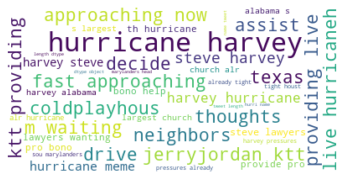

In [131]:
create_wordcloud(Hurricane_Tweets['Tweet'])

In [136]:
create_wordcloud(word_topic)

NameError: name 'nmf_model' is not defined

<B> BELOW WILL BE THE GEOPARSING first using Mordecai through Spacy</B>

In [18]:
Hurricane_Tweets.head()

,Tweet
0,if you do decide to drive in for coldplayhous...
1,as hurricane harvey is fast approaching now i...
2,is jerryjordan ktt providing live hurricaneh...
3,i m waiting for a steve harvey hurricane meme
4,the name of the hurricane is harvey steve ...


In [30]:
import requests 

In [34]:
requests.get('http://google.com')

<Response [200]>

In [2]:
Geoparser()

# geo.geoparse("Eiffel Tower is located in Paris")

Models path: /Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/mordecai/models/


GET http://localhost:9200/geonames/_count [status:N/A request:0.010s]
Traceback (most recent call last):
  File "/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/urllib3/connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/urllib3/util/connection.py", line 96, in create_connection
    raise err
  File "/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/urllib3/util/connection.py", line 86, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/elasticsearch/connection/http_urllib3.py", line 114, in perform_request
    response = self.pool.urlopen(method, url, body, retries=False, headers=self.headers, **kw)
  File "/Use

GET http://localhost:9200/geonames/_count [status:N/A request:0.005s]
Traceback (most recent call last):
  File "/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/urllib3/connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/urllib3/util/connection.py", line 96, in create_connection
    raise err
  File "/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/urllib3/util/connection.py", line 86, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/elasticsearch/connection/http_urllib3.py", line 114, in perform_request
    response = self.pool.urlopen(method, url, body, retries=False, headers=self.headers, **kw)
  File "/Use

IndexError: tuple index out of range

In [25]:
df["geoparse"] = [geo.geoparse(x) for x in Hurricane_Tweets["Tweet"]]

NameError: name 'geo' is not defined

In [45]:
ef flat_df(df):
    df_geo = df[df["geoparse"].str.len() != 0]
    df_geo = df_geo.explode('geoparse')
    df_geo = pd.concat([df_geo.drop(['geoparse'], axis=1), df_geo['geoparse'].apply(pd.Series)], axis=1)
    df_geo = pd.concat([df_geo.drop(['geo'], axis=1), df_geo['geo'].apply(pd.Series)], axis=1)
    df_geo = df_geo[df_geo['lat'].notnull()]
    df_geo.lat = df_geo.lat.astype(float)
    df_geo.lon =df_geo.lon.astype(float)
    return df_geo
    
df_clean = flat_df(df)

<B> Below will be my attempt at geoparsing with basic Spacy NER: </B>

In [22]:
import spacy
import os

In [21]:
nlp = spacy.load('en_core_web_sm')

In [56]:
import pandas as pd

In [122]:
# TXT_DIR = 'Tweets'
 
nlp = spacy.load('en_core_web_sm')
places = []
 
# for fn in os.listdir(TXT_DIR):
    # print(f'Processing {fn}')
    # with open(f'{TXT_DIR}/{fn}') as f:
        #tweets_df = pd.read_csv(fn, header = "infer", lineterminator='\n')
for tweet in Hurricane_Tweets_Cleaned_NaN["Tweet"]:
            # print(type(tweet))
    doc = nlp(tweet)
    places.extend([[ent.text, ent.start, ent.end] for ent in doc.ents if ent.label_ in ['GPE', 'LOC']])

In [133]:

df = pd.read_csv('places.csv')
 

In [134]:
def to_drop(place):
    if not all(c.isalpha() or c.isspace() for c in place) or place.islower():
        return True
    else:
        return False
 

In [135]:
df['to_drop'] = df.place.map(to_drop)
 
df_cleaned_places = df[df.to_drop==False]
df_cleaned_places.to_csv('cleaned_places.csv', index=False)
 
unique_places = df_cleaned_places.place.unique()
df_unique_places = pd.DataFrame(unique_places)
df_unique_places.to_csv('unique_places.csv', index=False)

In [130]:
tweet_places.to_csv('places.csv', index=False)

In [52]:
nlp.max_length= 50000000

<B> Below will be my attempt at geoparsing with basic GEOTEXT FROM MIT (https://github.com/elyase/geotext): </B>

In [5]:
pip install https://github.com/elyase/geotext/archive/master.zip

     | 2.3 MB 822 kB/s
  Created wheel for geotext: filename=geotext-0.3.0-py2.py3-none-any.whl size=2272451 sha256=22fbd22ce7c0fec0028951bcc815a0185ee830701eda59e788176dc6f46b6900
  Stored in directory: /private/var/folders/gg/2mbbfm3s611369mqfn821g8h0000gn/T/pip-ephem-wheel-cache-s4bbowc0/wheels/e7/a5/8c/3285a988c40b743f5f24ec003e42cad17d1ea762873b559b31
Successfully built geotext
Note: you may need to restart the kernel to use updated packages.


In [3]:
from geotext import GeoText

In [13]:
places = GeoText("London is a great city")
places.cities

['London']

OrderedDict([('US', 2), ('CN', 1)])

<b> Below will be another attempt using Geocoding from (https://github.com/shakasom/geocoding):</b>

In [18]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster